# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [237]:
# * import sys
# Importa el módulo sys, que es un módulo de la biblioteca estándar de Python.
# Este módulo proporciona acceso a variables y funciones que interactúan fuertemente con el
# intérprete de Python, como la manipulación de la ruta de búsqueda de módulos y la entrada/salida
# estándar, entre otros.
# * sys.path
# Es una lista que contiene las rutas en las que el intérprete de Python busca los módulos cuando
# usas import. Al intentar importar un módulo, Python busca en las rutas especificadas en esta
# lista.
# * sys.path.insert(0, '..')
# Inserta la ruta '..' (que representa el directorio padre) al inicio de la lista sys.path.
# Al agregarla en la posición 0, se asegura que cuando Python busque módulos para importar,
# primero verifique en el directorio padre antes de continuar con las rutas predeterminadas.

import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [238]:
# * from python_environment_check import check_packages
# Importa la función check_packages desde el módulo python_environment_check. 
# Este módulo, por su nombre, parece estar diseñado para verificar que el entorno de Python 
# tenga instaladas las versiones correctas de ciertos paquetes.
# * d = {...}
# Define un diccionario d que contiene como claves los nombres de varios paquetes 
# (por ejemplo, numpy, scipy, matplotlib, etc.) y como valores las versiones mínimas 
# requeridas de esos paquetes.
# * check_packages(d)
# La función check_packages toma como entrada el diccionario d y probablemente realiza una 
# verificación en el entorno actual de Python para asegurarse de que las versiones instaladas 
# de estos paquetes sean al menos las especificadas en el diccionario. Si alguno de los paquetes 
# no está instalado o tiene una versión incorrecta, es posible que la función lance un error o 
# sugiera instalar/actualizar los paquetes.

from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'mlxtend': '0.19.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2',
}
check_packages(d)

[OK] numpy 1.21.2
[OK] mlxtend 0.23.1
[OK] matplotlib 3.4.3
[OK] sklearn 1.0.2
[OK] pandas 1.3.2


# Chapter 09 - Predicting Continuous Target Variables with Regression Analysis

### Overview

- [Introducing regression](#Introducing-linear-regression)
  - [Simple linear regression](#Simple-linear-regression)
- [Exploring the Ames Housing Dataset](#Exploring-the-Ames-Housing-Dataset)
  - [Loading the Ames Housing dataset into a data frame](Loading-the-Ames-Housing-dataset-into-a-data-frame)
  - [Visualizing the important characteristics of a dataset](#Visualizing-the-important-characteristics-of-a-dataset)
- [Implementing an ordinary least squares linear regression model](#Implementing-an-ordinary-least-squares-linear-regression-model)
  - [Solving regression for regression parameters with gradient descent](#Solving-regression-for-regression-parameters-with-gradient-descent)
  - [Estimating the coefficient of a regression model via scikit-learn](#Estimating-the-coefficient-of-a-regression-model-via-scikit-learn)
- [Fitting a robust regression model using RANSAC](#Fitting-a-robust-regression-model-using-RANSAC)
- [Evaluating the performance of linear regression models](#Evaluating-the-performance-of-linear-regression-models)
- [Using regularized methods for regression](#Using-regularized-methods-for-regression)
- [Turning a linear regression model into a curve - polynomial regression](#Turning-a-linear-regression-model-into-a-curve---polynomial-regression)
  - [Modeling nonlinear relationships in the Ames Housing dataset](#Modeling-nonlinear-relationships-in-the-Ames-Housing-dataset)
  - [Dealing with nonlinear relationships using random forests](#Dealing-with-nonlinear-relationships-using-random-forests)
    - [Decision tree regression](#Decision-tree-regression)
    - [Random forest regression](#Random-forest-regression)
- [Summary](#Summary)

In [239]:
# * from IPython.display
# Importa desde el submódulo display del paquete IPython. Este módulo está diseñado para mostrar 
# y renderizar diferentes tipos de datos dentro de entornos interactivos, como Jupyter Notebooks.
# * import Image
# Importa la clase Image desde el módulo display. La clase Image se utiliza para mostrar 
# imágenes en el entorno interactivo (por ejemplo, en una celda de Jupyter Notebook).
# * %matplotlib inline
# Esto es una "magic command" (comando mágico) específico de IPython/Jupyter Notebook.
# Habilita la visualización de gráficos de matplotlib directamente dentro de las celdas del 
# notebook. Los gráficos se renderizan "en línea" (dentro del mismo cuaderno) sin necesidad 
# de abrir ventanas emergentes.

from IPython.display import Image
%matplotlib inline

# Introducing linear regression

## Simple linear regression

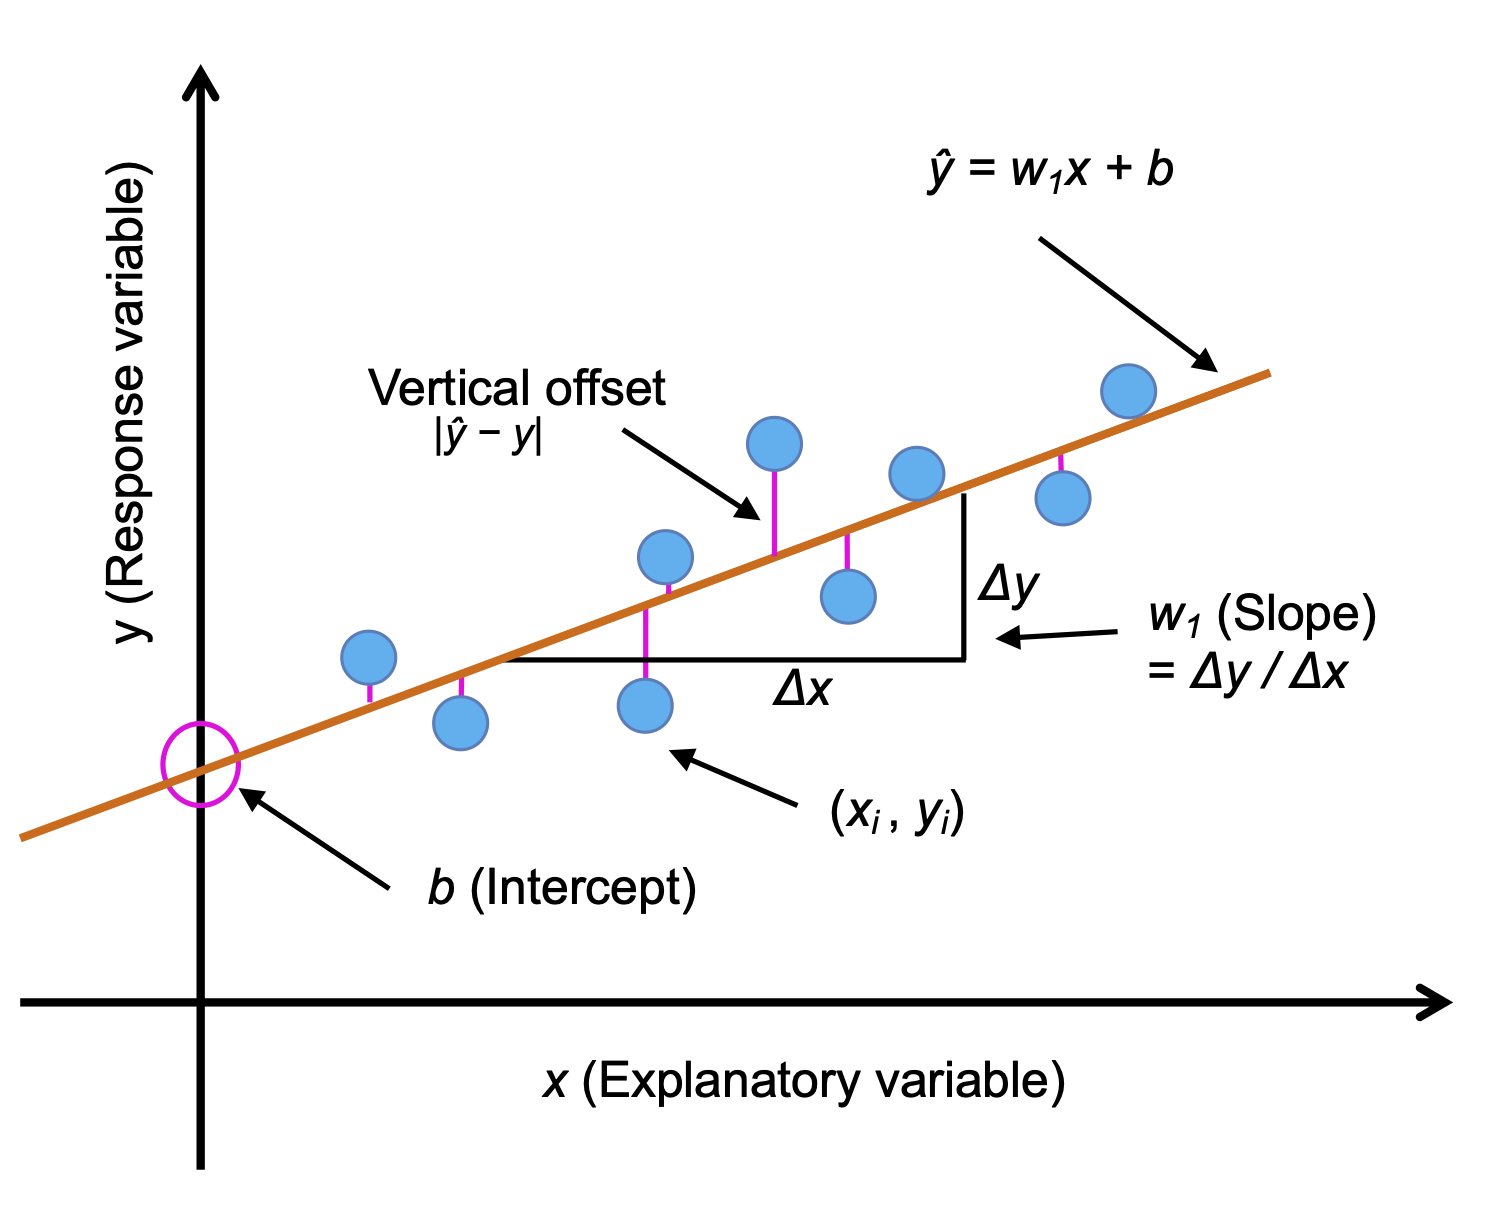

In [240]:
# * Image(...)
# Usa la clase Image (probablemente importada desde IPython.display, como en el ejemplo anterior) 
# para mostrar una imagen en un entorno interactivo como Jupyter Notebook.
# * filename='./figures/09_01.png'
# Especifica la ruta de la imagen que se desea mostrar. En este caso, la imagen se encuentra en el
# archivo './figures/09_01.png', que es una ruta relativa al directorio actual.
# * width=500
# Ajusta el ancho de la imagen a 500 píxeles. Esto redimensiona la imagen para que ocupe ese 
# espacio de ancho, mientras que su altura se ajusta proporcionalmente (si no se especifica una 
# altura).

Image(filename='figures/09_01.png', width=500) 

## Multiple linear regression

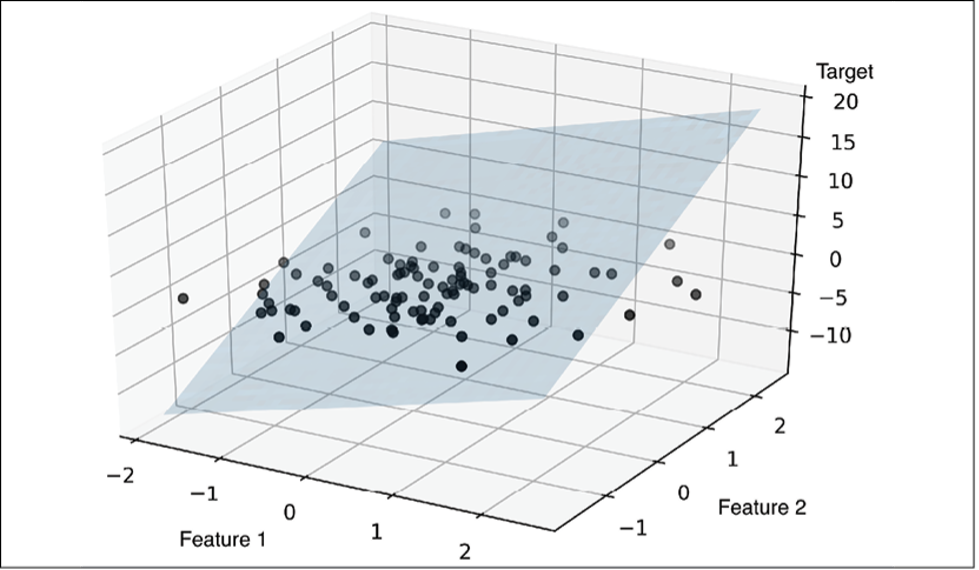

In [241]:
# * Image(...)
# Usa la clase Image (probablemente importada desde IPython.display, como en el ejemplo anterior) 
# para mostrar una imagen en un entorno interactivo como Jupyter Notebook.
# * filename='./figures/09_01_2.png'
# Especifica la ruta de la imagen que se desea mostrar. En este caso, la imagen se encuentra en el
# archivo './figures/09_01_2.png', que es una ruta relativa al directorio actual.
# * width=500
# Ajusta el ancho de la imagen a 500 píxeles. Esto redimensiona la imagen para que ocupe ese 
# espacio de ancho, mientras que su altura se ajusta proporcionalmente (si no se especifica una 
# altura).

Image(filename='figures/09_01_2.png', width=500) 

# Exploring the Ames Housing dataset

## Loading the Ames Housing dataset into a data frame

- Dataset source: http://jse.amstat.org/v19n3/decock/AmesHousing.txt
- Dataset documentation: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
- Dataset write-up: http://jse.amstat.org/v19n3/decock.pdf

- `'Overall Qual'`: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
- `'Overall Cond'`: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
- `'Gr Liv Area'`: Above grade (ground) living area square feet
- `'Central Air'`: Central air conditioning

       N	No
       Y	Yes

- `'Total Bsmt SF'`: Total square feet of basement area
- `'SalePrice'`: Sale price $$

In [242]:
import pandas as pd

columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

# sep='\t': This argument specifies that the file is tab-separated (\t is the tab character).
# The default separator for CSV files os a comma, but since this is a tab-separated file, we explicitly define it here.

# This function reads a file into a DataFrame.
# usecols=columns: This argument tells pandas to only load the specified columns (the list you defined earlier)
# from the dataset, tather than loading every column to the file.

df.head() # This function displays the first five rows of the DataFrame df by default.

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [243]:
df.shape # Attribute in Pandas is used to get the dimensions of the DataFrame df

(2930, 6)

In [244]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

# Converts the categorical values in the 'Central Air' column of the DataFrame df into numerical values.
# df['Central Air']: This selects the 'Central Air' column from the DataFrame df.
# The map() function is used to replace the categorical values in the column with the corresponding numerical values based on:
# 'N' is replaced with 0 (indicating "No central air").
# 'Y' is replaced with 1 (indicating "Yes, central air").

In [245]:
df.isnull().sum()

# This functions checks each value in the DataFrame df to see if it is NaN (Not a Number),
# sum() sums up al the True values (the null values) in each column.
# The sum() function, when applied to a DataFrame of Boolean values, treats True as 1 and False as 0.

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [246]:
# remove rows that contain missing values

df = df.dropna(axis=0)

# dropna() is a function used to remove missiong data (NaN values) from a DataFrame.
# axis=0: Specifies that you want to drop rows with missing values.
# axis=0 means "rows". If you wanted to drop columns with missiong values, you would use axis=1.



df.isnull().sum()

# This function checks for null (missing) values again after rows with missing data have been removed.

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

## Visualizing the important characteristics of a dataset

In [247]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

# mlxtend.plotting: mlxtend (short for "machine learning extensions") is a Python library that contains additional tools for data analysis.

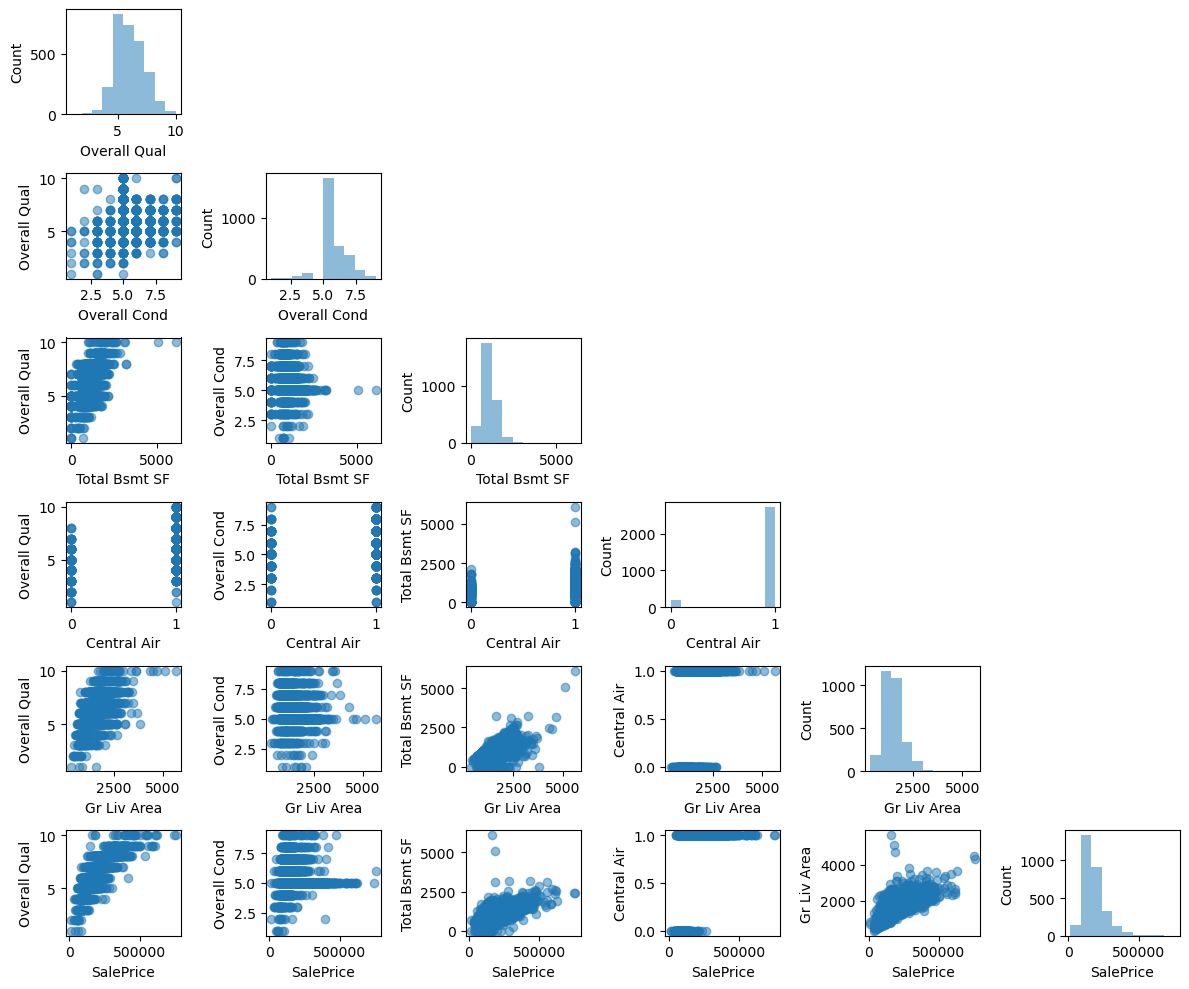

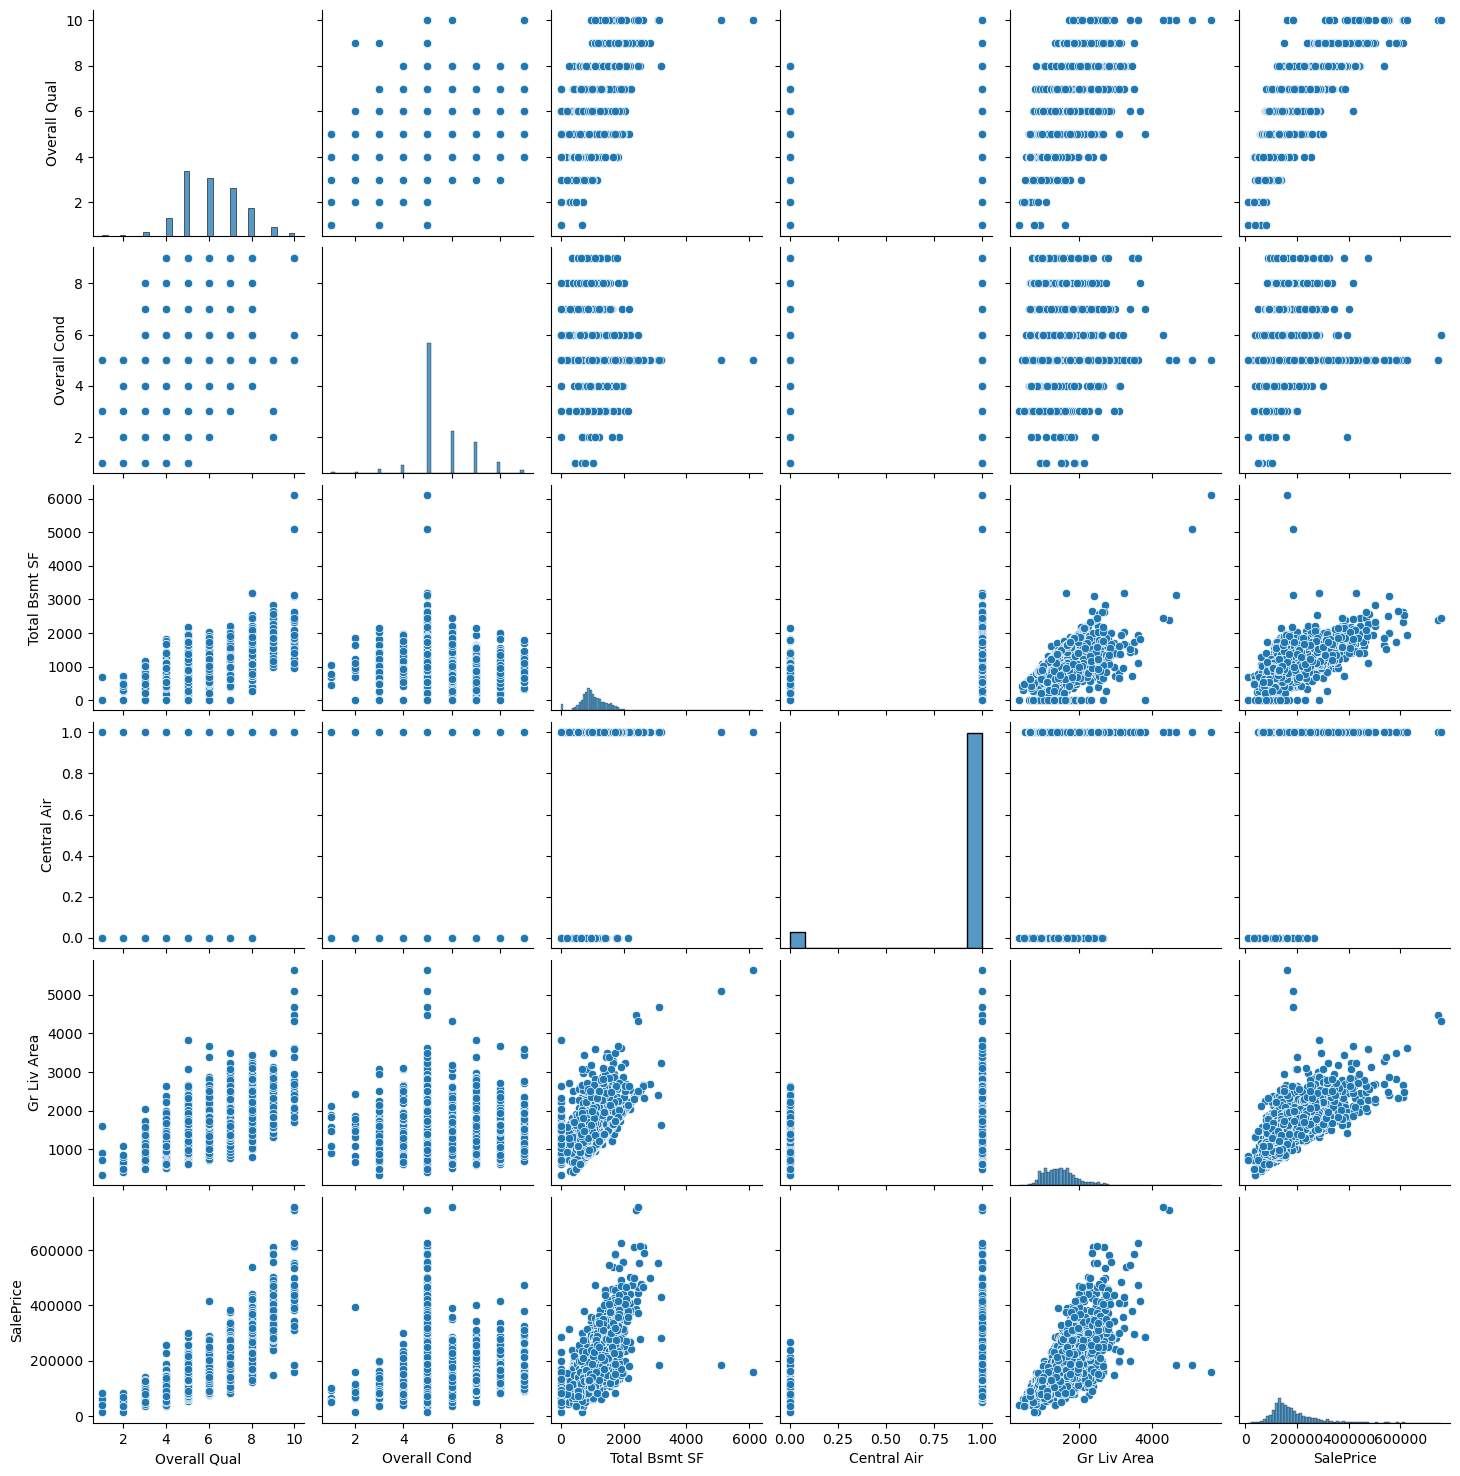

In [248]:
scatterplotmatrix(df.values, figsize=(12, 10), 
                  names=df.columns, alpha=0.5)

# names: This argument provides the names (labels) for each variable in the scatterplot matrix.
# df.columns: This extracts the column names from the DataFrame df, so that each scatterplot in the matrix is labeled with the name of the
# alpha sets the transparency level of the points in the scatterplot.

plt.tight_layout()

# plt.tight_layout() is used in Matplotlib to automatically adjust the spacing between subplots in a figure.

#plt.savefig('figures/09_04.png', dpi=300)
plt.show()

import seaborn as sb
sb.pairplot(df)
plt.show()

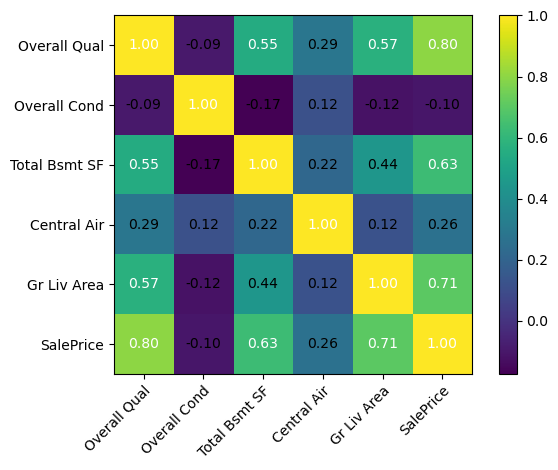

In [249]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

plt.tight_layout()

# plt.tight_layout() is used in Matplotlib to automatically adjust the spacing between subplots in a figure.

#plt.savefig('figures/09_05.png', dpi=300)
plt.show()

# Implementing an ordinary least squares linear regression model

## Solving regression for regression parameters with gradient descent

In [250]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

## <span style="color: red;"> Using only one feature </span>

In [251]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [252]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [253]:
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

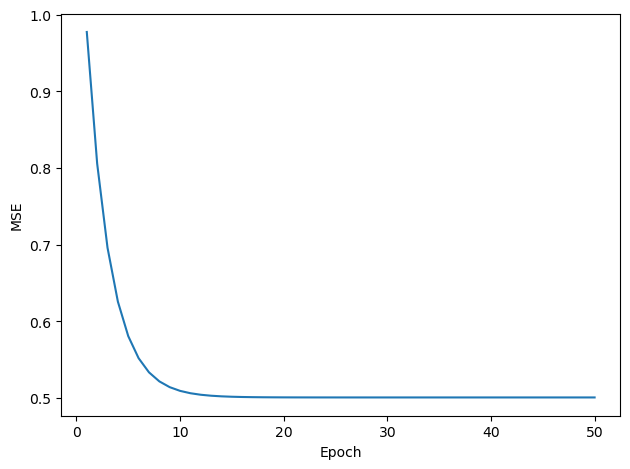

In [254]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
#plt.savefig('figures/09_06.png', dpi=300)
plt.show()

In [255]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

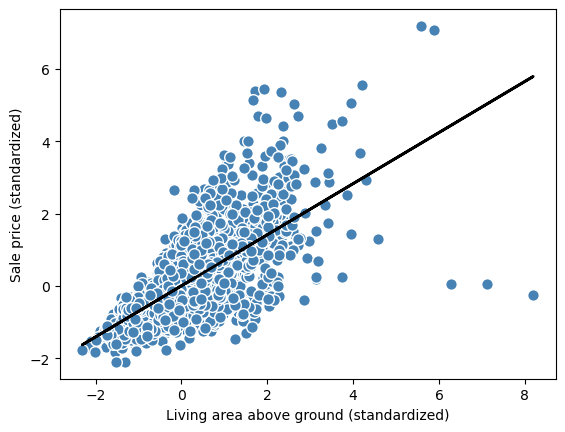

In [256]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

#plt.savefig('figures/09_07.png', dpi=300)
plt.show()

In [257]:
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'Sale price: ${target_reverted.flatten()[0]:.2f}')

Sale price: $292507.07


In [258]:
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


## Estimating the coefficient of a regression model via scikit-learn

In [259]:
from sklearn.linear_model import LinearRegression

In [260]:
slr = LinearRegression()

# LinearRegression(): This is a class provided by the sci-kit learn library (imported as sklearn),
# which implements linear regression algorithm.

slr.fit(X, y)

# fit(X, y): This method is used to train the linear regression model.
# X: The 2D NumPy array containing the feature(s) (in this case, just 'Gr Liv Area').
# y: The 1D NumPy array containing the target variable (in this case, 'SalePrice').

y_pred = slr.predict(X)

# predict(X): This method is used to make predictions based on the fitted model.

print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

index = 2 # Index of the element you want to predict for
single_feature_value = X[index] # Extract the single feature value

print(single_feature_value)

single_pred = slr.predict([single_feature_value])

print(single_pred)


Slope: 111.666
Intercept: 13342.979
[1329]
[161747.43610435]


In [261]:
# Check the result

Slope = 111.666
Intercept = 13342.979
print(Slope * 1329 + Intercept)

161747.093


## <span style="color: red;"> Single prediction </span>

In [262]:
# Predict SalePrice for new features: Gr liv Area=850
new_data = ([[850]])
predicted_price = slr.predict(new_data)

print("Predicted SalePrice: ", predicted_price)

Predicted SalePrice:  [108259.29832051]


## <span style="color: red;"> Check the single prediction manually </span>

In [263]:
print(850 * 111.666 + 13342.979)

108259.079


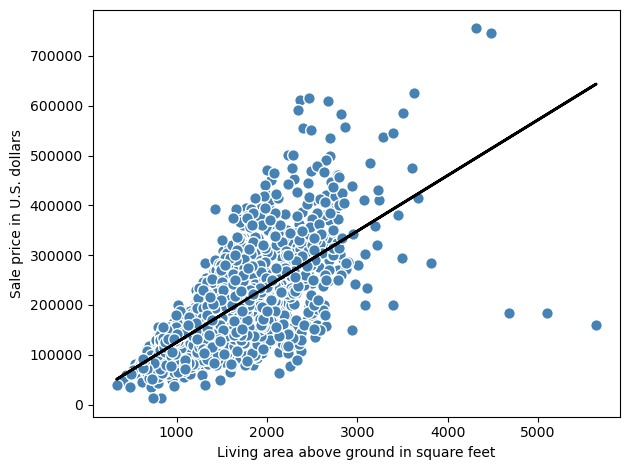

In [264]:
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
#plt.savefig('figures/09_08.png', dpi=300)
plt.show()

**Normal Equations** alternative:

In [265]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print(f'Slope: {w[1]:.3f}')
print(f'Intercept: {w[0]:.3f}')

Slope: 111.666
Intercept: 13342.979


# Fitting a robust regression model using RANSAC

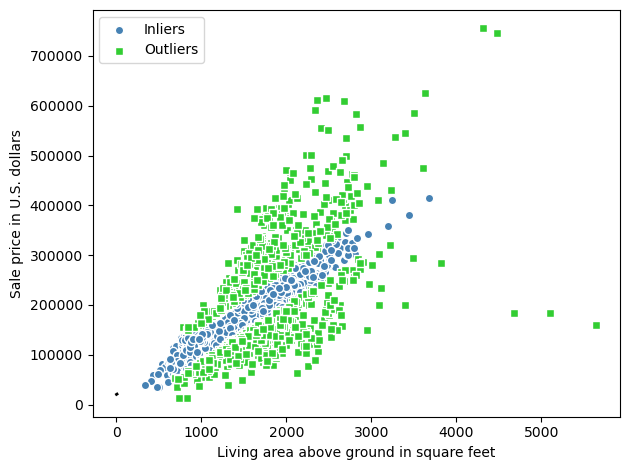

In [266]:
from sklearn.linear_model import RANSACRegressor


ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, # default
                         min_samples=0.95, 
                         loss='absolute_error', # default
                         residual_threshold=None, # default 
                         random_state=123)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_09.png', dpi=300)
plt.show()

In [267]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 106.348
Intercept: 20190.093


In [268]:
def median_absolute_deviation(data):
    return np.median(np.abs(data - np.median(data)))
    
median_absolute_deviation(y)

37000.0

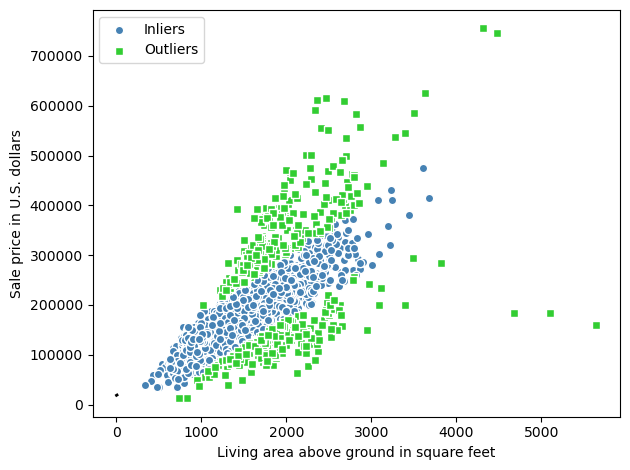

In [269]:
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, # default
                         min_samples=0.95, 
                         loss='absolute_error', # default
                         residual_threshold=65000, # default 
                         random_state=123)

# max_trials=100: This parameter controls the maximum number of iterations RANSAC will try.

# min_samples: This specifies the minimum number of samples required to fit the base model (LinearRegression in this case).
# min_samples=0.95 means that at least 95% of the dataset should be used for fitting the model in each iteration. It can be specified as an inlier.

# The loss function used to evaluate how well the model fits the inlier data.
# 'absolute error' is the default loss function, also known as the L1 loss.

# residual_threshold=65000: The residual threshold defines the maximum allowed error for a data point to be classified as an inlier.
# Any data point with a residual (error) larger than 65,000 will be considered an outlier and excluded from the model fitting.

# random_state=123: A seed for the random number generator, ensuring that the randomization process in RANSAC is reproducible.

ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_

# ransac.inlier_mask_ is a boolean array that indicates whether each sample in the dataset is classified
# as an inlier (True) or an outlier (False).

outlier_mask = np.logical_not(inlier_mask)

# np.logical_not(inlier_mask) is a NumPy function that negates the boolean values in inlier_mask.
# It converts True values to False and viceversa.

line_X = np.arange(3, 10, 1)

line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_10.png', dpi=300)
plt.show()

In [270]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 105.631
Intercept: 18314.587


# Evaluating the performance of linear regression models

In [271]:
from sklearn.model_selection import train_test_split


target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

In [272]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

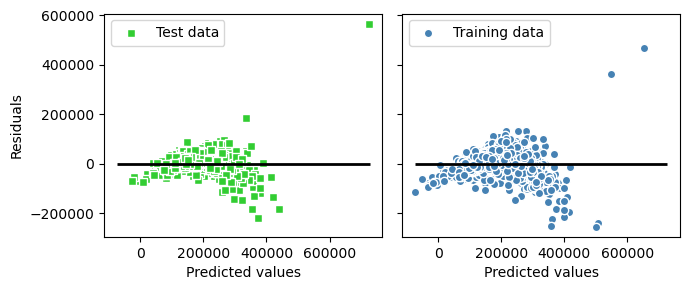

In [273]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_11.png', dpi=300)
plt.show()

In [274]:
from sklearn.metrics import mean_squared_error


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1497216245.85
MSE test: 1516565821.00


In [275]:
from sklearn.metrics import mean_absolute_error


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 25983.03
MAE test: 24921.29


In [276]:
from sklearn.metrics import r2_score


r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

R^2 train: 0.77
R^2 test: 0.75


# Using regularized methods for regression

In [277]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[26251.38276394   804.70816337    41.94651964 11364.80761309
    55.67855548]


In [278]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {train_mse:.3f}, test: {test_mse:.3f}')

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 train: {train_r2:.3f}, {test_r2:.3f}')

MSE train: 1497216262.014, test: 1516576825.348
R^2 train: 0.769, 0.752


Ridge regression:

In [279]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1.0)

LASSO regression:

In [280]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=1.0)

Elastic Net regression:

In [281]:
from sklearn.linear_model import ElasticNet


elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Turning a linear regression model into a curve - polynomial regression

In [282]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [283]:
from sklearn.preprocessing import PolynomialFeatures


lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

print(X_quad)
print(258**2)
print(270**2)
print(294**2)

[[1.00000e+00 2.58000e+02 6.65640e+04]
 [1.00000e+00 2.70000e+02 7.29000e+04]
 [1.00000e+00 2.94000e+02 8.64360e+04]
 [1.00000e+00 3.20000e+02 1.02400e+05]
 [1.00000e+00 3.42000e+02 1.16964e+05]
 [1.00000e+00 3.68000e+02 1.35424e+05]
 [1.00000e+00 3.96000e+02 1.56816e+05]
 [1.00000e+00 4.46000e+02 1.98916e+05]
 [1.00000e+00 4.80000e+02 2.30400e+05]
 [1.00000e+00 5.86000e+02 3.43396e+05]]
66564
72900
86436


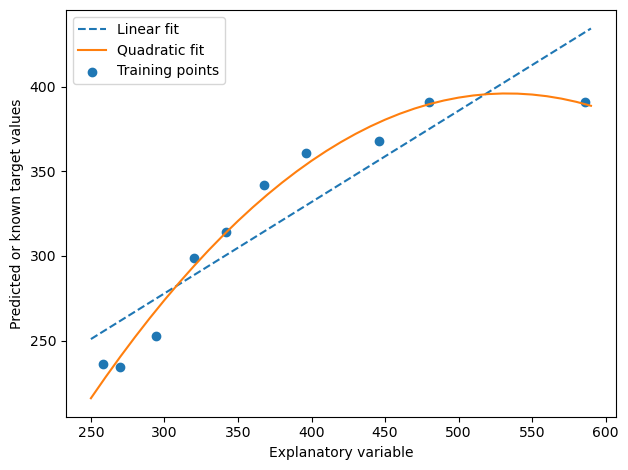

In [284]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_12.png', dpi=300)
plt.show()

In [285]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [286]:
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)
print(f'Training MSE linear: {mse_lin:.3f}'
      f', quadratic: {mse_quad:.3f}')


r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)
print(f'Training R^2 linear: {r2_lin:.3f}'
      f', quadratic: {r2_quad:.3f}')

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


## Modeling nonlinear relationships in the Ames Housing dataset

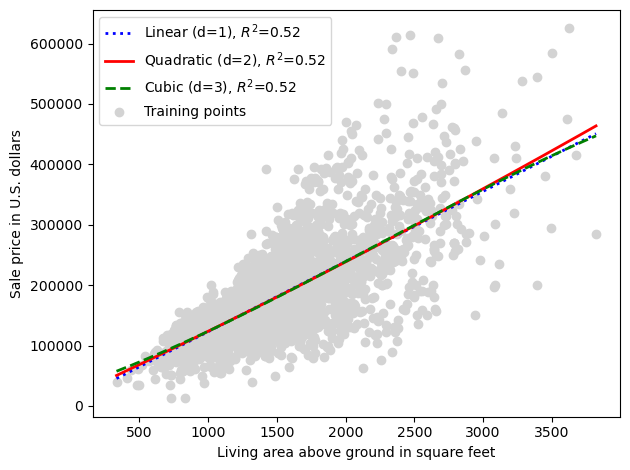

In [287]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]


regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green', 
         lw=2,
         linestyle='--')


plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/09_13.png', dpi=300)
plt.show()

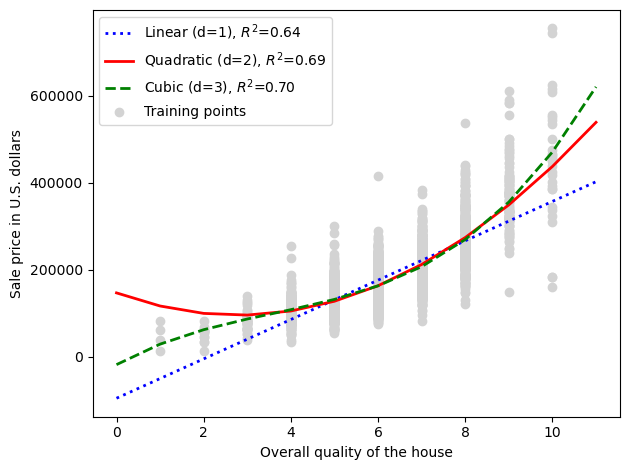

In [288]:
X = df[['Overall Qual']].values
y = df['SalePrice'].values


regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green', 
         lw=2,
         linestyle='--')


plt.xlabel('Overall quality of the house')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_14.png', dpi=300)
plt.show()

# Dealing with nonlinear relationships using random forests

## Decision tree regression

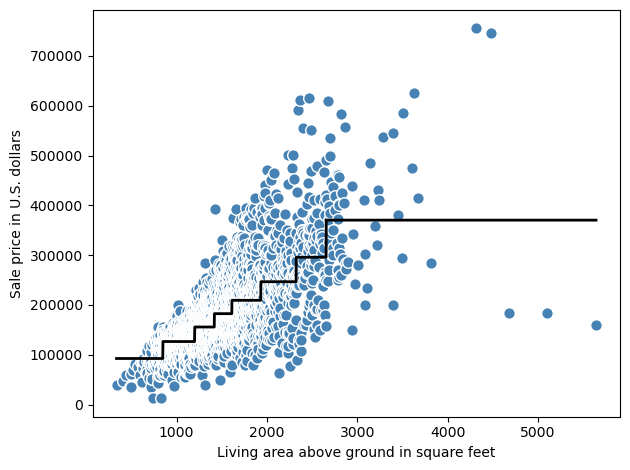

In [289]:
from sklearn.tree import DecisionTreeRegressor


X = df[['Gr Liv Area']].values
y = df['SalePrice'].values



tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
#plt.savefig('figures/09_15.png', dpi=300)
plt.show()

In [290]:
tree_r2 = r2_score(y, tree.predict(X))
tree_r2

0.5144569334885711

## Random forest regression

In [291]:
target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

In [292]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')


r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

MAE train: 8305.18
MAE test: 20821.77
R^2 train: 0.98
R^2 test: 0.85


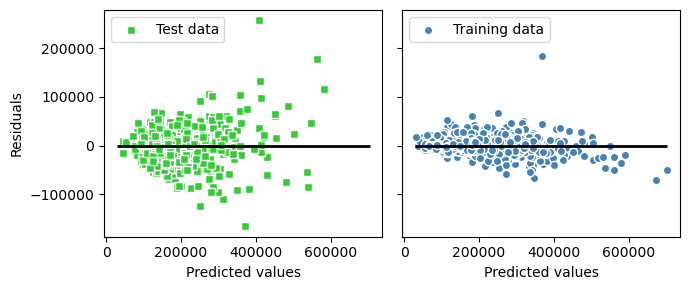

In [293]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_16.png', dpi=300)
plt.show()

## <span style="color: red;"> Modeling multiple nonlinear relationships in the Ames Housing dataset: linear </span>

In [294]:
X = df[['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area']].values
y = df['SalePrice'].values
# ...
# ...

slr = LinearRegression()
# ...

slr.fit(X, y)
# ...

LinearRegression()

**In a Jupyter Environment, please rerun this cell to show the HTML representation or trust the notebook.**
**On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [295]:
# Print the coefficient of determination
y_pred = slr.predict(X)
# ...
# ...

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", R2)

Mean Absolute Error (MAE): 25916.499038390666
Mean Squared Error (MSE): 1509458325.2945914
R-squared: 0.7633463796618122


In [296]:
coefficients = slr.coef_        # Coefficients from the trained model
intercept = slr.intercept_      # Intercept from the trained model

# Print the coefficients
print("Coefficients:", coefficients)

# If you also want to print the intercept
print("Intercept:", intercept)

Coefficients: [27920.57014417    39.14656367    52.05178473]
Intercept: -108601.0826976086


## <span style="color: red;"> Make a single prediction </span>

In [297]:
# CODE

## <span style="color: red;"> Check the result manually </span>

In [298]:
# CODE

## <span style="color: red;"> Modeling multiple nonlinear relationships in the Ames Housing dataset: quadratic </span>

In [299]:
# CODE

# Summary

---

Readers may ignore the next cell.

In [300]:
# Run a command in the terminal from a Python environment (such as a Jupyter Notebook or a 
# script that allows system commands to convert a Jupyter notebook to a file Python script. 
# * !
# This symbol is used in environments such as Jupyter Notebooks to execute system commands 
# operational directly from the notebook. In this case, the command is an execution of a 
# python script.
# * python convert_notebook_to_script.py
# This command runs a Python script called convert_notebook_to_script.py. This file 
# is located in the previous directory (../ indicates that it is one level up in the system 
# files). The purpose of this script is to convert a Jupyter notebook (.ipynb) into a 
# Python script file (.py).
# * --input ch09.ipynb
# This is an option or argument that tells the script what the input file is, in this 
# case, the notebook ch09.ipynb.
# * --output ch09.py
# This option tells the script to save the output (the converted file) with the name
# ch09.py, which is a Python script.

! python ../.convert_notebook_to_script.py --input ch09.ipynb --output ch09.py

[NbConvertApp] Converting notebook ch09.ipynb to script
[NbConvertApp] Writing 31469 bytes to ch09.py
